In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras 

In [30]:
data = keras.datasets.cifar10
df = data.load_data()
df  # dtset is a image in form og 1/0's matrix

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [31]:
(X_train , y_train) , (x_test , y_test) = df
X_train.shape  # 60000 images with resolution of 28*28 28 pixels in single row/col

(60000, 28, 28)

In [29]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
X_train[0]  # here 0 means is a darker ,  for some shade value is defined

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

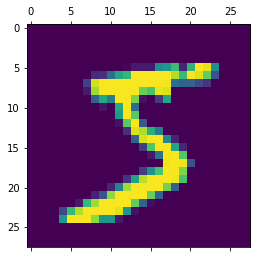

In [12]:
plt.matshow(X_train[0])  # purple area = 0 

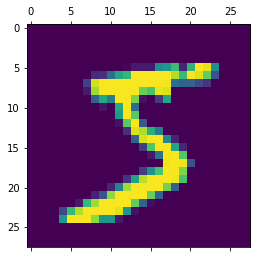

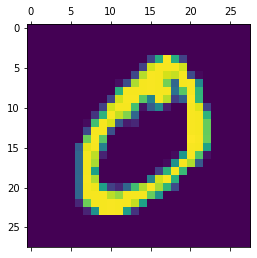

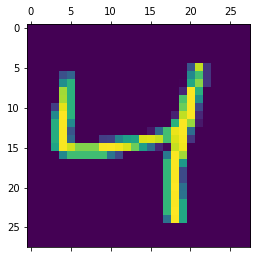

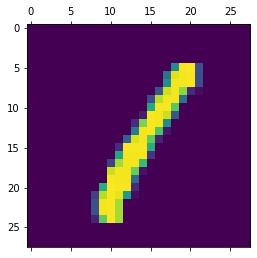

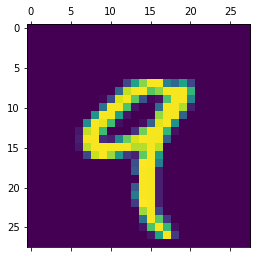

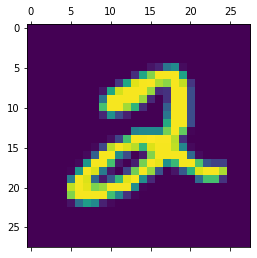

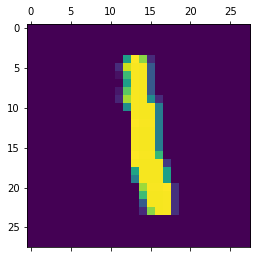

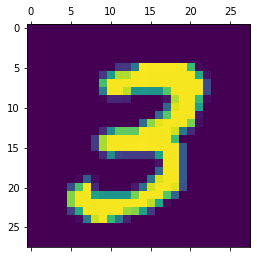

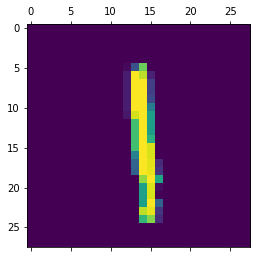

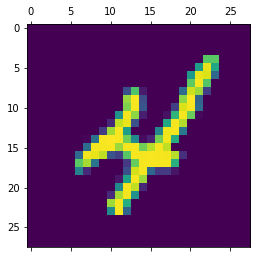

In [13]:
for i in range(10):
  plt.matshow(X_train[i])

In [14]:
y_test.shape

(10000,)

In [15]:
y_test.ndim

1

In [18]:
x_test.ndim

3

In [15]:
# flatten matrix i.e 3D to normal : 
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = x_test.reshape(-1, 28*28)   # -1 detects the length automatically i.e len(x_test)

In [16]:
X_train_flat[0].ndim

1

#ANN MODEL CREATION :

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense   # dense helps to create multiple layers and sequential hlps to store these layers

In [5]:
# So now in Dense/ Hidden Layer, adding layers list data structure:
model = Sequential([
                    Dense(units=10,  # adding 10 neurons in 1st layer
                    input_shape=(784,),  # here input layer is 28*28 dimension ,X_train_flat[0].shape = 784
                    activation='sigmoid' ),  # activation funcn is sigmoid type

                    Dense(units=100,  
                    activation='sigmoid' )  # this is second hidden layer so input_shape i.e inp is not req as we r providing inp only once in 1st hidden layer itself
                   

])
#In case loss occurs , need to lower it by optimizer so that accuracy is high

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # to see how much loss has occured by funcn
     metrics=['accuracy'] # like we had r2_score,MSE, others like this a funcn in form of matrices
)

#TRAIN/FIT MODEL :

In [18]:
model.fit(X_train_flat,y_train, epochs = 10 )  #epochs means how many times model needs to see data if more then good training ,for each epoch we get loss,accuracy which r rinversely proportional

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 10.0986 - accuracy: 0.8387
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1059 - accuracy: 0.8785
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5237 - accuracy: 0.8853
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5180 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4158 - accuracy: 0.8857
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3470 - accuracy: 0.8889
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3198 - accuracy: 0.8868
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2761 - accuracy: 0.8892
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.0918 - accuracy: 0.8910
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.13

#TEST MODEL

In [19]:
y_pred = model.predict(X_test_flat)
y_pred

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 3.7524656e-25,
        1.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 3.0493617e-24, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 4.3955426e-11, 0.0000000e+00, ..., 1.9342539e-22,
        1.0000000e+00, 7.1030281e-31],
       [1.2808468e-28, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        2.0593760e-14, 0.0000000e+00]], dtype=float32)

In [20]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
model.evaluate(X_test_flat ,y_test)  # 7% loss, 86.63 % accurate

313/313 [==============================] - 1s 2ms/step - loss: 7.0274 - accuracy: 0.8663


[7.02739143371582, 0.8662999868392944]